# Object detection

In [1]:
# !mim download mmdet --config mask-rcnn_swin-t-p4-w7_fpn_1x_coco --dest .
%load_ext autoreload
%autoreload 2

from PIL import Image
import torch

from mmdet.apis import init_detector, inference_detector
from mmengine.config import Config
from cfm_task_models.legacy import *

from cfm_task_models.split_utils import SplitSwinTransformer, SplitTwoStageDetector, TwoInputIdentity, SplitRepPointsV2MaskDetector

config_file_old = 'obj_det/mask-rcnn_swin-t-p4-w7_fpn_1x_coco.py'
checkpoint_file_old = 'obj_det/mask_rcnn_swin-t-p4-w7_fpn_1x_coco_20210902_120937-9d6b7cfa.pth'
config_file = 'obj_det/cfgs/mask_reppoitsv2_swin_tiny_simplified.py'
checkpoint_file = 'obj_det/chkpts/mask_reppointsv2_swin_tiny_patch4_window7_3x.pth'


# model_init = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
# result = inference_detector(model, 'demo/demo.jpg')

# from mmdet.registry import MODELS
# MODELS.get('SwinTransformer')
# MODELS.get('TwoStageDetector')
model = SplitRepPointsV2MaskDetector.create_from_cfg_and_checkpoint(config_file, checkpoint_file)

03/21 09:14:28 - mmengine - INFO - Loads checkpoint by local backend from path: obj_det/chkpts/mask_reppointsv2_swin_tiny_patch4_window7_3x.pth
Done!!, save to obj_det/chkpts/mask_reppointsv2_swin_tiny_patch4_window7_3x_converted-dd7afe98.pth


/local-scratch2/aharell/CFM-Task-Models/.venv/lib/python3.9/site-packages/mmdet/models/task_modules/builder.py:39: UserWarning: ``build_assigner`` would be deprecated soon, please use ``mmdet.registry.TASK_UTILS.build()`` 
  warnings.warn('``build_assigner`` would be deprecated soon, please use '
/local-scratch2/aharell/CFM-Task-Models/.venv/lib/python3.9/site-packages/mmdet/models/task_modules/builder.py:24: UserWarning: ``build_iou_calculator`` would be deprecated soon, please use ``mmdet.registry.TASK_UTILS.build()`` 
  warnings.warn(
/local-scratch2/aharell/CFM-Task-Models/.venv/lib/python3.9/site-packages/mmdet/models/task_modules/builder.py:46: UserWarning: ``build_sampler`` would be deprecated soon, please use ``mmdet.registry.TASK_UTILS.build()`` 
  warnings.warn('``build_sampler`` would be deprecated soon, please use '
/local-scratch2/aharell/CFM-Task-Models/.venv/lib/python3.9/site-packages/mmdet/apis/inference.py:90: UserWarning: dataset_meta or class names are not saved in 

Loads checkpoint by local backend from path: obj_det/chkpts/mask_reppointsv2_swin_tiny_patch4_window7_3x_converted-dd7afe98.pth


/local-scratch2/aharell/CFM-Task-Models/.venv/lib/python3.9/site-packages/mmdet/models/task_modules/builder.py:39: UserWarning: ``build_assigner`` would be deprecated soon, please use ``mmdet.registry.TASK_UTILS.build()`` 
  warnings.warn('``build_assigner`` would be deprecated soon, please use '
/local-scratch2/aharell/CFM-Task-Models/.venv/lib/python3.9/site-packages/mmdet/models/task_modules/builder.py:24: UserWarning: ``build_iou_calculator`` would be deprecated soon, please use ``mmdet.registry.TASK_UTILS.build()`` 
  warnings.warn(
/local-scratch2/aharell/CFM-Task-Models/.venv/lib/python3.9/site-packages/mmdet/models/task_modules/builder.py:46: UserWarning: ``build_sampler`` would be deprecated soon, please use ``mmdet.registry.TASK_UTILS.build()`` 
  warnings.warn('``build_sampler`` would be deprecated soon, please use '


In [3]:
from copy import deepcopy
cfg = Config.fromfile('obj_det/mask-rcnn_swin-t-p4-w7_fpn_1x_coco.py')
model = SplitTwoStageDetector.create_from_instance_and_cfg(model_init, cfg, cut_point=1)

# prp = deepcopy(model.data_preprocessor)
# model.data_preprocessor = TwoInputIdentity()

print(model.frontend_preprocessor)

# model.backbone = SplitSwinTransformer.create_from_instance_and_cfg(model.backbone, cfg)

DetDataPreprocessor()


In [4]:
model2 = SplitTwoStageDetector.create_from_cfg_and_checkpoint(config_file, checkpoint_file)
model2.frontend_preprocessor
model2.data_preprocessor


Loads checkpoint by local backend from path: obj_det/mask_rcnn_swin-t-p4-w7_fpn_1x_coco_20210902_120937-9d6b7cfa.pth


TwoInputIdentity()

In [10]:
import json
from mmengine.registry import RUNNERS
from mmdet.utils import get_test_pipeline_cfg

from mmcv.transforms import Compose

cfg = model_init.cfg.copy()
test_pipeline = get_test_pipeline_cfg(cfg)

test_pipeline = Compose(test_pipeline)

# data_ = dict(img_path='demo/demo.jpg', img_id=0)


cfg_tr = cfg.copy()
cfg_tr['work_dir'] = './logs'
cfg_tr['train_dataloader']['dataset']['data_root'] = '../data/coco/'
cfg_tr['val_dataloader']['dataset']['data_root'] = '../data/coco/'
cfg_tr['val_evaluator']['ann_file'] = '../data/coco/annotations/instances_val2017.json'
# print(list(cfg_tr.train_dataloader.keys()))
runner = RUNNERS.build(cfg_tr)
# print(cfg_tr.train_dataloader)
# with open('data/coco/annotations/instances_train2017.json', 'r') as file:
#     data_json = json.load(file)


# data_ = train_pipeline(data_json)

# data_['inputs'] = data_['inputs'].unsqueeze(0)
# data_['data_samples'] = [data_['data_samples']]

# print(train_pipeline)
# print(list(data_json.keys()))

03/13 17:54:25 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.5 (default, May 30 2022, 18:17:32) [GCC 7.5.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1673671344
    GPU 0: NVIDIA GeForce RTX 2080 Ti
    CUDA_HOME: /usr/local/cuda-10.1
    NVCC: Cuda compilation tools, release 10.1, V10.1.24
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.13.1+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_

/local-scratch2/aharell/CFM-Task-Models/.venv/lib/python3.9/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


03/13 17:54:26 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
03/13 17:54:26 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

In [13]:


dl = runner.train_dataloader
print(model.cut_point)
for i,data in enumerate(dl):
    model.zero_grad()
    model.eval()
    # im['inputs'] = torch.stack(im['inputs'])
    # print(list(data_.keys()))
    # data_ = train_pipeline(im)
    # data_ = prp(data_, False)
    # data_['inputs'] = model.backbone.split_forward_v2(data_['inputs'], output_layer=model.cut_point-1)
    # data_['inputs'] = {
    #                "hw_shape": data_['inputs'][0],
    #
    #                "outs": data_['inputs'][1]}
    # data = prp(data, False)
    # print(data['inputs'][0].shape)
    
    feat = model.feature_frontend(data)
    # print(feat['inputs']['outs'][0].shape)
    print(model.backend_loss(feat))
    print(model.cut_point)
    # print(model.test_step(feat)[0])
    # losses = model.loss(data_['inputs'], data_['data_samples'])
    # loss, losses = model.parse_losses(losses)
    break


loading annotations into memory...
Done (t=13.15s)
creating index...
index created!
1
(tensor(0.8683, grad_fn=<AddBackward0>), OrderedDict([('loss', tensor(0.8683, grad_fn=<AddBackward0>)), ('loss_rpn_cls', tensor(0.0683, grad_fn=<AddBackward0>)), ('loss_rpn_bbox', tensor(0.0386, grad_fn=<AddBackward0>)), ('loss_cls', tensor(0.1824, grad_fn=<MeanBackward0>)), ('acc', tensor(93.9453)), ('loss_bbox', tensor(0.3257, grad_fn=<MeanBackward0>)), ('loss_mask', tensor(0.2532, grad_fn=<MeanBackward0>))]))
1


In [14]:
print(list(data['data_samples']))

[<DetDataSample(

    META INFORMATION
    img_shape: (427, 512)
    img_path: '../data/coco/train2017/000000578037.jpg'
    img_id: 578037
    ori_shape: (427, 640)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: HorizontalBoxes(
                tensor([], size=(0, 4)))
            labels: tensor([], dtype=torch.int64)
            masks: BitmapMasks(num_masks=0, height=427, width=512)
        ) at 0x7fce442ba430>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: HorizontalBoxes(
                tensor([[449.9900,  25.8800, 512.0000,  70.7800],
                        [224.1400,  61.2700, 322.7500, 382.9600],
                        [442.5600,  83.0300, 512.0000, 316.2200],
                        [292.3400,  91.6600, 347.4300, 265.0600],
                        [381.0900,  91.2200, 418.5100, 188.1400],
             

(array([[  0.,   0.,   0., ...,  35.,   1.,   0.],
        [  0.,   0.,   0., ..., 100.,   0.,   0.],
        [  0.,   0.,   0., ...,  27.,   1.,   0.],
        ...,
        [  2.,  86.,  34., ...,  54.,   7.,   0.],
        [  0.,   0.,   0., ...,  28.,   3.,   0.],
        [  0.,   0.,   0., ...,  59.,   1.,   0.]]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <a list of 2550 BarContainer objects>)

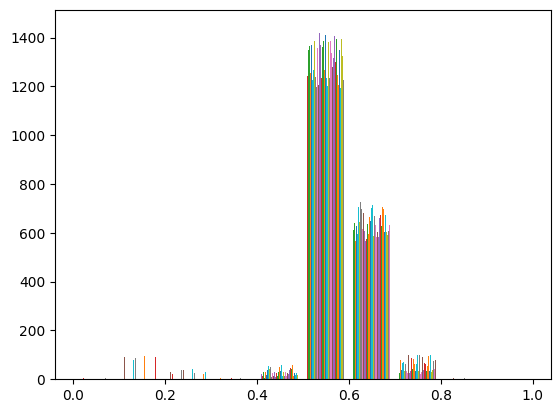

In [69]:
from matplotlib import pyplot as plt
mx = feat['inputs']['outs'][0][0,:].max().item()
mn = feat['inputs']['outs'][0][0,:].min().item()
f_np = feat['inputs']['outs'][0][0,:].reshape(2048,-1).cpu().detach()
f_np = f_np.detach().numpy()
# print(f_np)
plt.hist((f_np-mn)/(mx-mn))

In [76]:
# feat2 = feat['inputs']['outs'][0].view(-1, *feat['inputs']['hw_shape'],
#                                 model.backbone.num_features[0]).permute(0, 3, 1,
#                                                                 2).contiguous()
# print(feat2.shape)
norm0 = getattr(model.backbone, 'norm0')
feats_to_comp  = norm0( feat['inputs']['outs'][0]).view(-1, *feat['inputs']['hw_shape'],
                                model.backbone.num_features[0]).permute(0, 3, 1,
                                                                2).contiguous()
print(feats_to_comp.shape)

torch.Size([2, 96, 200, 272])


In [12]:
for data in vdl:
    # model.cut_point = 0
    # model.data_preprocessor = model.frontend_preprocessor
    # print(model.val_step(data))
    # model.cut_point = 1
    # model.data_preprocessor = TwoInputIdentity()
    data_ = model.frontend_preprocessor(data, False)
    print(data_['data_samples'])
    break
    data_['inputs'] = model.backbone.split_forward_v2(data_['inputs'], output_layer=model.cut_point-1)
    data_['inputs'] = {#"x": data_['inputs'][0],
                    "hw_shape": data_['inputs'][0],
                    "outs": data_['inputs'][1]}
    print(len(data_['inputs']['outs']))
    print(data_)
    # data_['inputs'] = [data_['inputs']]
    # data_['data_samples'] = [data_['data_samples']]
    # # forward the model
    with torch.no_grad():
        results = model.backend_inference(data_)[0]
    break

[<DetDataSample(

    META INFORMATION
    ori_shape: (427, 640)
    batch_input_shape: (800, 1216)
    img_shape: (800, 1199)
    scale_factor: (1.8734375, 1.873536299765808)
    img_path: '../data/coco/val2017/000000397133.jpg'
    pad_shape: (800, 1216)
    img_id: 397133

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
            masks: BitmapMasks(num_masks=0, height=427, width=640)
        ) at 0x7fce441dbe20>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[217.6200, 240.5400, 256.6100, 298.2900],
                        [  1.0000, 240.2400, 347.6300, 427.0000],
                        [388.6600,  69.9200, 498.0700, 347.5400],
                        [135.5700, 249.4300, 157.8900, 278.2200],
                        [ 31.2800, 3

In [11]:
vdl = runner.val_dataloader

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
loading annotations into memory...
Done (t=0.51s)
creating index...
index created!


In [ ]:
model.backbone.stages[0]

SwinBlockSequence(
  (blocks): ModuleList(
    (0): SwinBlock(
      (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (attn): ShiftWindowMSA(
        (w_msa): WindowMSA(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=96, out_features=96, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
          (softmax): Softmax(dim=-1)
        )
        (drop): DropPath()
      )
      (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (ffn): FFN(
        (layers): Sequential(
          (0): Sequential(
            (0): Linear(in_features=96, out_features=384, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
          )
          (1): Linear(in_features=384, out_features=96, bias=True)
          (2): Dropout(p=0.0, inplace=False)
        )
        (dropout_layer): DropPath()
        (gamma